In [90]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 30)

# 英文用市值加权；中文用等值加权，空头结果相似

# load data

In [91]:
import os
import glob

In [92]:
#factor_path = '../../Data/factors'
factor_path = '../../Data/selected_factors'
target_path = '../../Data/future_1_monthly_return.csv'
riskfree_path = ''
CATEGORY_COLS = ['industry_category']  #　要被转换为哑变量的因子名，需要跟文件名一致

In [93]:
def load_data(factor_path, target_path):
    # 读取因子
    file_paths = glob.glob(os.path.join(factor_path, '*.csv'))  # glob：搜寻文件用的简易版正则
    factor_names = []
    factor_tables = []
    for fp in file_paths:
        #print(fp)
        factor_name = fp[fp.rfind('\\')+1:fp.rfind('.')]
        print(f'loading {factor_name} from {fp}')
        factor_names.append(factor_name)
        df = pd.read_csv(fp, index_col=[0]).replace(np.inf, np.nan)  # 计算因子时可能存在除数为0于是得到inf
        df.index = pd.DatetimeIndex(df.index)
        factor_tables.append(df)
    print(f'{len(factor_names)} factors have been loaded in total.')
    
    # 读取收益率
    target_table = pd.read_csv(target_path, index_col=[0])
    target_table.index = pd.DatetimeIndex(target_table.index)
    print(f'target has been loaded from {target_path}.')
    
    return factor_names, factor_tables, target_table

In [94]:
factor_names, factor_tables, target_table = load_data(factor_path, target_path)

loading chcsho from ../../Data/selected_factors\chcsho.csv
loading chinv from ../../Data/selected_factors\chinv.csv
loading herf from ../../Data/selected_factors\herf.csv
loading industry_category from ../../Data/selected_factors\industry_category.csv
loading mve from ../../Data/selected_factors\mve.csv
loading mve_ia from ../../Data/selected_factors\mve_ia.csv
6 factors have been loaded in total.
target has been loaded from ../../Data/future_1_monthly_return.csv.


In [95]:
#target_table = target_table.loc['2013-01-01':]
target_table

,1,2,3,4,5,6,7,8,9,10,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
Trdmnt,,,,,,,,,,,,,,,,,,,,,
2013-01-31,0.090047,-0.000833,NaN,0.078326,-0.029032,-0.057866,0.073811,0.120227,-0.061792,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.125217,-0.103333,NaN,-0.050746,-0.102990,-0.136276,-0.196538,0.071066,0.093304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,-0.070577,0.025093,NaN,0.115304,-0.033333,-0.022222,0.026616,-0.072444,-0.004016,0.276471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,0.122460,0.102837,NaN,0.102444,0.053640,0.136364,0.048765,0.272992,0.307460,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,-0.232797,-0.177796,NaN,-0.147485,-0.170909,-0.085447,-0.220129,-0.057339,-0.151889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.006218,0.014775,NaN,-0.124602,0.143541,0.024887,-0.057339,0.093137,0.321460,-0.025907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,0.007303,0.076263,NaN,-0.014026,-0.117155,-0.008830,0.029197,0.008969,-0.315245,-0.021277,...,-0.060453,NaN,NaN,NaN,-0.150468,-0.043646,-0.175308,-0.112635,NaN,NaN
2021-09-30,0.087563,-0.145472,NaN,-0.115385,0.037915,-0.071269,0.035461,-0.031111,0.090198,0.070652,...,-0.063983,NaN,NaN,NaN,0.025424,0.069324,-0.087818,-0.001672,-0.093937,-0.080378


In [96]:
factor_tables[0]

,1,2,3,4,5,6,7,8,9,10,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
Shrchgdt,,,,,,,,,,,,,,,,,,,,,
1990-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# regularize time 1
统一化日期（如到月末）不先在每个因子的构建过程中分别完成，而是一齐在这里完成。构建因子时仍保留其原始时间，即第一次公布信息从而投资者知晓的时间，便于数据在其他差异时间频率的项目中复用。到每个项目内才开始统一化时间频率，将已知值向未来方向填充，这符合在固定时点利用到最新信息。  
注意，此节仅仅是向index中添入标准时间频率，而不删除原有其他的时间频率，这是为了下一节的处理缺失值。

In [97]:
# target的时间频率不能改动。而统一因子的时间频率需要参照target的时间频率
# 注意target的数据含义因项目而异。在本项目中，target是未来一个月后的月收益率，而非当月的月收益率，从文件名中可以看出。
# 如果在其他场合中，target仍是当期收益(即原始数据)，还必须要对target再做shift，不然时间出现偏差

time_range = target_table.index
time_range

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31',
               ...
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', name='Trdmnt', length=107, freq=None)

In [98]:
factor_tables_regularized1 = []
for ft in factor_tables:
    new_index = ft.index.append(time_range).drop_duplicates().sort_values(ascending=True)
    factor_tables_regularized1.append(ft.reindex(index=new_index))

In [99]:
factor_tables_regularized1[0]

,1,2,3,4,5,6,7,8,9,10,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
1990-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# imputate missing values
由于原始数据的缺漏，也由于将不同频率的因子变更为统一频率，必然产生缺失值。在这里完成对缺失值的处理

In [100]:
def imputate_forward(factor_tables):
    factor_tables_imputated = []
    for ft in factor_tables:
        new_table = ft.fillna(method='ffill')
        factor_tables_imputated.append(new_table)
    return factor_tables_imputated

In [101]:
factor_tables_imputated = imputate_forward(factor_tables_regularized1)

In [102]:
factor_tables_imputated[0]

,1,2,3,4,5,6,7,8,9,10,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
1990-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,0.027226,0.000659,0.2,-0.054829,0.157714,0.05,0.5,-0.013318,0.2,0.161904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,0.027226,0.000659,0.2,-0.054829,0.157714,0.05,0.5,-0.013318,0.2,0.161904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-23,0.027226,0.000659,0.2,-0.054829,0.157714,0.05,0.5,-0.013318,0.2,0.161904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-24,0.027226,0.000659,0.2,-0.054829,0.157714,0.05,0.5,-0.013318,0.2,0.161904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# regularize time 2
在处理完缺失值后，才能丢弃不在模型中用到的日期

In [103]:
factor_tables_regularized2 = []
for ft in factor_tables_imputated:
    factor_tables_regularized2.append(ft.reindex(index=time_range))

In [104]:
#for ft in factor_tables_regularized2:
    #print(len(ft.index))

In [105]:
factor_tables_regularized2[0]

,1,2,3,4,5,6,7,8,9,10,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
Trdmnt,,,,,,,,,,,,,,,,,,,,,
2013-01-31,0.470109,0.000031,0.2,0.099999,0.290226,0.30,0.248695,1.061021,0.05,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,0.470109,0.000031,0.2,0.099999,0.290226,0.30,0.248695,1.061021,0.05,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,0.470109,0.000031,0.2,0.099999,0.290226,0.30,0.248695,1.061021,0.05,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,0.470109,0.000031,0.2,0.099999,0.290226,0.30,0.248695,1.061021,0.05,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,0.470109,0.000031,0.2,0.099999,0.290226,0.30,0.248695,1.000000,0.05,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.027226,0.027923,0.2,-0.054829,0.157714,0.05,0.500000,-0.013318,0.20,0.161904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,0.027226,0.000659,0.2,-0.054829,0.157714,0.05,0.500000,-0.013318,0.20,0.161904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,0.027226,0.000659,0.2,-0.054829,0.157714,0.05,0.500000,-0.013318,0.20,0.161904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
target_table

,1,2,3,4,5,6,7,8,9,10,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
Trdmnt,,,,,,,,,,,,,,,,,,,,,
2013-01-31,0.090047,-0.000833,NaN,0.078326,-0.029032,-0.057866,0.073811,0.120227,-0.061792,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.125217,-0.103333,NaN,-0.050746,-0.102990,-0.136276,-0.196538,0.071066,0.093304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,-0.070577,0.025093,NaN,0.115304,-0.033333,-0.022222,0.026616,-0.072444,-0.004016,0.276471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,0.122460,0.102837,NaN,0.102444,0.053640,0.136364,0.048765,0.272992,0.307460,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,-0.232797,-0.177796,NaN,-0.147485,-0.170909,-0.085447,-0.220129,-0.057339,-0.151889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,0.006218,0.014775,NaN,-0.124602,0.143541,0.024887,-0.057339,0.093137,0.321460,-0.025907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,0.007303,0.076263,NaN,-0.014026,-0.117155,-0.008830,0.029197,0.008969,-0.315245,-0.021277,...,-0.060453,NaN,NaN,NaN,-0.150468,-0.043646,-0.175308,-0.112635,NaN,NaN
2021-09-30,0.087563,-0.145472,NaN,-0.115385,0.037915,-0.071269,0.035461,-0.031111,0.090198,0.070652,...,-0.063983,NaN,NaN,NaN,0.025424,0.069324,-0.087818,-0.001672,-0.093937,-0.080378


# reconstruct data
处理完因子后，将数据维度从以因子为最外层转换为以日期为最外层，即从一个因子一张表格改为同一日期一张表格，形成可以被模型所处理的一条条记录。

In [107]:
def reconstruct_data(factor_names, factor_tables, target_table):
  
    # 化以因子为第一维度为以日期为第一维度
    # 即同一因子一张表-->同一日期一张表
    
    # 先进行转置，将时间转换为columns，便于按column抽取
    factor_tables_T = []
    for ft in factor_tables:
        factor_tables_T.append(ft.T)
    target_table_T = target_table.T
    
    # 经过上文步骤，target的时间索引已经和所有factor相同，故直接使用target的时间索引
    # 时间索引已转置到columns上
    time_range = target_table_T.columns
    
    time_tables = []  # 新存储因子的列表
    for i in range(len(time_range)):
        target_column = target_table_T.iloc[:,i]
        target_column.name = 'y'
        factor_columns = []
        for j in range(len(factor_names)):
            name = factor_names[j]
            table = factor_tables_T[j]
            factor_column = table.iloc[:,i]
            factor_column.name = name
            factor_columns.append(factor_column)
        time_table = pd.concat([target_column]+factor_columns,axis=1)
        time_tables.append(time_table)
    
    return time_tables

In [108]:
time_tables = reconstruct_data(factor_names, factor_tables_regularized2, target_table)

In [109]:
time_tables[-1]

,y,chcsho,chinv,herf,industry_category,mve,mve_ia
1,-0.055046,0.027226,-0.087293,0.028573,None,19.639855,1.750537
2,0.082147,0.000659,0.055403,0.144145,None,18.994841,3.242802
3,NaN,0.200000,-0.000718,0.000460,None,13.462291,-1.312239
4,0.031881,-0.054829,-0.010115,0.000739,None,14.892551,-0.931532
5,0.050228,0.157714,0.081961,0.002606,None,14.656300,-1.117798
...,...,...,...,...,...,...,...
603150,NaN,NaN,NaN,NaN,None,NaN,NaN
603176,NaN,NaN,NaN,NaN,None,NaN,NaN
603215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603216,NaN,NaN,NaN,NaN,None,NaN,NaN


# discard records with missing values

In [110]:
time_tables_dropna = []
for tt in time_tables:
    time_tables_dropna.append(tt.dropna())

In [111]:
time_tables_dropna[-1]

,y,chcsho,chinv,herf,industry_category,mve,mve_ia
1,-0.055046,0.027226,-0.087293,0.028573,None,19.639855,1.750537
2,0.082147,0.000659,0.055403,0.144145,None,18.994841,3.242802
4,0.031881,-0.054829,-0.010115,0.000739,None,14.892551,-0.931532
5,0.050228,0.157714,0.081961,0.002606,None,14.656300,-1.117798
6,0.087805,0.050000,0.128898,0.001222,None,15.526598,-0.225440
...,...,...,...,...,...,...,...
605336,0.014579,0.008700,0.064815,0.000471,None,15.378582,-0.612437
605337,0.225647,0.400000,-0.057879,0.003407,None,15.988897,-0.718159
605358,-0.117574,0.141670,0.048787,0.000855,None,17.945815,1.832662
605369,0.366228,0.005425,0.022322,0.001387,None,16.284482,0.465524


# the final data to use

In [112]:
time_tables_final = time_tables_dropna

# add industry dummy variables
形成记录后才能添加哑变量

In [113]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
def dummy_transform(X_train, X_test):
    enc = OneHotEncoder(handle_unknown='ignore')
    dummy_train = enc.fit_transform(X_train.to_numpy()).toarray()
    dummy_test = enc.transform(X_test.to_numpy()).toarray()
    dummy_train = pd.DataFrame(dummy_train)
    dummy_test = pd.DataFrame(dummy_test)

    return dummy_train, dummy_test

# construct portfolio

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
def construct_portfolio(model, window:int, time_range, time_tables, size:float=0.1, is_tree:bool=False, least_records:int=10000,
                       category_cols=[''], use_dummy=False, verbose=0):
    
    # 计算统计指标的数据
    results_table = pd.DataFrame(columns=['real','pred'])
    # 计算回测指标的数据
    columns = ['long','short','longshort']
    returns_table = pd.DataFrame(columns=columns)
    
    if not len(time_range) == len(time_tables):
        print('error: the lengths of time_range and time_tables do not match.' )
        return
    
    for i in range(len(time_range)):
        # 1. 抽取window范围的记录
        # 用第i-window至i-1的记录来预测第i
        if i < window:
            continue
        if verbose >= 1:
            print(f'{i-window} - {i-1} predict {i} {time_range[i]}')

        records_train = pd.concat(time_tables[i-window:i], axis=0).dropna()
        number_records = len(records_train)
        if verbose >=2:
            print(f'has {number_records} record(s).')
        if number_records <= least_records:
            if verbose >= 2:
                print(f'records less than{least_records}.')
            continue
        y_train = records_train.iloc[:,0]
        X_train = records_train.iloc[:,1:]
        
        records_test = time_tables[i]
        y_test = records_test.iloc[:,0]
        X_test = records_test.iloc[:,1:]
        
        # 2. 预处理数据：哑变量、归一化
        if use_dummy:  # 增加哑变量
            X_train_category = X_train[category_cols] 
            X_test_category = X_test[category_cols]
            X_train_dummy, X_test_dummy = dummy_transform(X_train_category, X_test_category)
  
        X_train = X_train.drop(category_cols, axis=1)
        X_test = X_test.drop(category_cols, axis=1)
        
        if not is_tree:  
            scaler = StandardScaler()
            X_train = pd.DataFrame(scaler.fit_transform(X_train))
            X_test = pd.DataFrame(scaler.transform(X_test))
        else:  # 如果是tree模型，就不需要做scale，但还是drop掉index，为了和无index的dummy拼接
            X_train = X_train.reset_index(drop=True)
            X_test = X_test.reset_index(drop=True)

        if use_dummy:
            # 合并归一化后的因子和哑变量
            X_train = pd.concat([X_train, X_train_dummy], axis=1)
            X_test = pd.concat([X_test, X_test_dummy], axis=1)            
        
        # 3. 跑模型    
        model.fit(y=y_train.to_numpy(), X=X_train.to_numpy())
        y_pred = model.predict(X_test.to_numpy())
        
        y_pred = pd.Series(y_pred, index=y_test.index)
        real_pred = pd.concat([y_test, y_pred],axis=1)
        real_pred.columns = ['real','pred']
        
        real_pred = real_pred.sort_values(by='pred',ascending=False)
        #print(real_pred)
        number_stocks = round(size * len(y_test))
        long = real_pred['real'].iloc[:number_stocks].mean()
        short = -1 * real_pred['real'].iloc[-1 * number_stocks:].mean()
        longshort = (long + short) / 2 
        new_returns = pd.DataFrame([[long,short,longshort]],
                                  columns=columns, index=[time_range[i]])
        
        results_table = pd.concat([results_table,real_pred],axis=0)
        returns_table = pd.concat([returns_table, new_returns],axis=0)
        
    return results_table, returns_table

# calculate statistical metrics

In [117]:
from sklearn.metrics import r2_score, mean_squared_error

In [118]:
def calculate_metrics(results_table):
    real = results_table.loc[:,'real']
    pred = results_table.loc[:,'pred']
    
    r2 = r2_score(real,pred)
    rmse = np.sqrt(mean_squared_error(real,pred))
    
    metrics_results = pd.DataFrame([
        r2,
        rmse
    ],
        index=[
            'R2',
            'RMSE'
        ],
        columns=['metrics']
                )
    
    return metrics_results

# backtest portfolio

In [119]:
def backtest_portfolio(returns_table):
    means = []
    cumureturns = []
    maxdrawdowns = []
    sharperatios = []
    
    for column_name in returns_table.columns:
        returns = returns_table.loc[:,column_name]
        means.append(np.mean(returns))
        cumureturns.append(cal_cumureturns(returns,column_name))
        maxdrawdowns.append(cal_maxdrawdown(returns))
        sharperatios.append(cal_sharperatio(returns))
        
    backtest_results = pd.DataFrame(
        [
            means,
            cumureturns,
            maxdrawdowns,
            sharperatios
        ],
        index=[
            'mean',
            'cumureturn',
            'maxdrawdown',
            'sharperatio'
        ],
        columns=returns_table.columns
    )
    
    return backtest_results

In [120]:
# 改进：增加无风险利率对照
def cal_sharperatio(returns):
    mean = np.mean(returns) * 12
    std = np.std(returns) * np.sqrt(12)
    sharperatio = (mean*12/100)/std
    return sharperatio

In [121]:
def cal_cumureturns(returns, label):
    cumureturn = 0
    cumureturns = returns.copy()
    for i in range(len(returns)):
        ret = returns[i]
        cumureturn = (cumureturn+1)*(1+ret)-1
        cumureturns[i] = cumureturn
    plt.plot(cumureturns, label=label)
    plt.legend()
    return cumureturn

In [122]:
def cal_maxdrawdown(returns):
    maxdrawdown = 0
    cumureturn = 0
    cumureturns = []
    for ret in returns:
        cumureturn = (cumureturn+1)*(1+ret) -1
        cumureturns.append(cumureturn)
    for i in range(1, len(cumureturns)):
        diffs = []
        for j in range(i):
            diffs.append(cumureturns[j] - cumureturns[i])
        maxdiff = max(diffs)
        if maxdiff > 0 and maxdiff >= maxdrawdown:
            maxdrawdown = maxdiff
    return maxdrawdown

# evaluate strategy
整合construct portfolio和backtest portfolio

In [123]:
def evaluate_strategy(model, window:int, time_range, time_tables, size:float=0.1, is_tree:bool=False, least_records:int=10000,
                     category_cols=CATEGORY_COLS, use_dummy=False, verbose=0):
    results_table, returns_table = construct_portfolio(model, window, time_range, time_tables,
                                                                      size, is_tree, least_records,
                                                                      category_cols=category_cols, use_dummy=use_dummy,
                                                      verbose=verbose)
    return calculate_metrics(results_table), backtest_portfolio(returns_table)

# run model

In [124]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

### LinearRegression

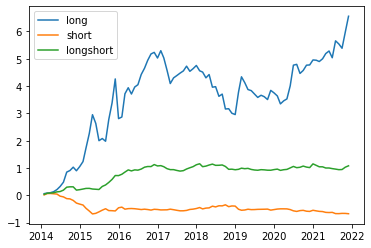

In [125]:
# 17年开始
a, b = evaluate_strategy(LinearRegression(fit_intercept=False), 12, time_range, time_tables_final)

In [126]:
a

,metrics
R2,-0.602379
RMSE,0.186212


In [127]:
b

,long,short,longshort
mean,0.025146,-0.008820,0.008163
cumureturn,6.556483,-0.675564,1.078994
maxdrawdown,2.338928,0.747772,0.242308
sharperatio,0.120903,-0.048203,0.115065


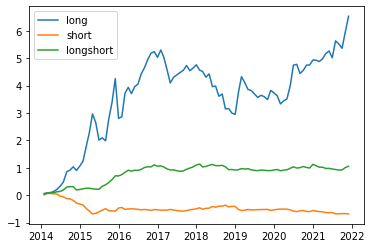

In [128]:
a, b = evaluate_strategy(LinearRegression(fit_intercept=False),  12, time_range, time_tables_final, use_dummy=True)

In [129]:
a

,metrics
R2,-0.615676
RMSE,0.186983


In [130]:
b

,long,short,longshort
mean,0.025105,-0.009017,0.008044
cumureturn,6.528141,-0.682116,1.057563
maxdrawdown,2.349690,0.747650,0.244635
sharperatio,0.120729,-0.049162,0.114587


### Ridge

In [ ]:
a,b = evaluate_strategy(Ridge(fit_intercept=False),  12, time_range, time_tables_final)

In [ ]:
a

In [ ]:
b

In [ ]:
a,b = evaluate_strategy(Ridge(fit_intercept=False),  12, time_range, time_tables_final, use_dummy=True)

In [ ]:
a

In [ ]:
b

### Lasso

In [ ]:
a,b = evaluate_strategy(Lasso(fit_intercept=False),  12, time_range, time_tables_final)

In [ ]:
a

In [ ]:
b

In [ ]:
a,b = evaluate_strategy(Lasso(fit_intercept=False),  12, time_range, time_tables_final, use_dummy=True)

In [ ]:
a

In [ ]:
b

### ElasticNet

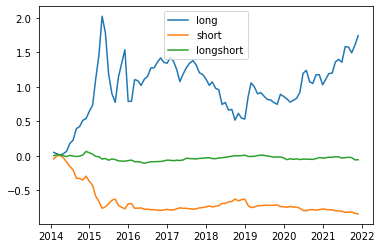

In [131]:
a,b = evaluate_strategy(ElasticNet(fit_intercept=False),  12, time_range, time_tables_final)

In [132]:
a

,metrics
R2,-0.008296
RMSE,0.147713


In [133]:
b

,long,short,longshort
mean,0.013874,-0.014947,-0.000537
cumureturn,1.741479,-0.842121,-0.057151
maxdrawdown,1.506290,0.849412,0.173172
sharperatio,0.072404,-0.069066,-0.017346


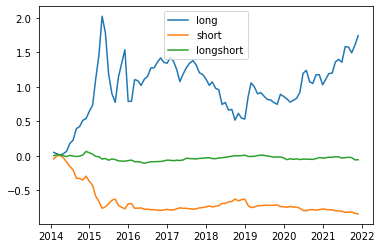

In [134]:
a,b = evaluate_strategy(ElasticNet(fit_intercept=False),  12, time_range, time_tables_final, use_dummy=True)

In [135]:
a

,metrics
R2,-0.008296
RMSE,0.147713


In [136]:
b

,long,short,longshort
mean,0.013874,-0.014947,-0.000537
cumureturn,1.741479,-0.842121,-0.057151
maxdrawdown,1.506290,0.849412,0.173172
sharperatio,0.072404,-0.069066,-0.017346


### SVR

In [ ]:
a,b = evaluate_strategy(SVR(),  12, time_range, time_tables_final)

In [ ]:
a

In [ ]:
b

In [ ]:
a,b = evaluate_strategy(SVR(),  12, time_range, time_tables_final, use_dummy=True)

In [ ]:
a

In [ ]:
b

### XGBRegressor
tree不需哑变量，将文本转换为数值即可

In [ ]:
a,b = evaluate_strategy(XGBRegressor(random_state=42),  12, time_range, time_tables_final, is_tree=True)

In [ ]:
a

In [ ]:
b

In [ ]:
a,b = evaluate_strategy(XGBRegressor(random_state=42),  12, time_range, time_tables_final, is_tree=True, use_dummy=True)

In [ ]:
a

In [ ]:
b

In [ ]:
# 看xgboost的feature importance，gain_value

In [ ]:
# 返回跑过的model，存在pickle(升级版dill)中

# draft

In [ ]:
ds = pd.date_range(start='2000-01-01', periods=20)
ds

In [ ]:
data_tables = []
for i in range(20):
    data = pd.DataFrame(np.ones((100,3)),columns=['y','x','industry_category'])
    data['industry_category'].iloc[0:50] = 'A'
    data['industry_category'].iloc[50:100] = 'B'
    for j in range(50):
        data.iloc[j,1] = j*0.02 - 0.5
        data.iloc[j,0] = data.iloc[j,1] + np.random.randn()*0.01       
    for j in range(50):
        data.iloc[j+50,1] = j*0.02 - 0.5
        data.iloc[j+50,0] = 2 * data.iloc[j+50,1] + np.random.randn()*0.01
    data_tables.append(data)

In [ ]:
data_tables[6].head(50)

In [ ]:
a, b = evaluate_strategy(LinearRegression(fit_intercept=False), 1, ds, data_tables, least_records=0, use_dummy=True)

In [ ]:
a

In [ ]:
b

In [ ]:
real1 = a.iloc[:,0]
pred1 = a.iloc[:,1]
real2 = a.iloc[:,2]
pred2 = a.iloc[:,3]

In [ ]:
real1

In [ ]:
pred1

In [ ]:
r2_score(real1,pred1)